In [1]:
import pickle
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
from collections import defaultdict
import scipy
import numpy as np
import pickle
import itertools
from dist_rsa.dbm import *
from dist_rsa.utils.helperfunctions import *
from dist_rsa.utils.config import abstract_threshold,concrete_threshold
import edward as ed
from dist_rsa.utils.simple_vecs import real_vecs as simple_vecs
import itertools


/home/rcohngordon/dist-rsa/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
simple_vecs

{'child': array([ 0.1, -1. ]),
 'man': array([0., 0.]),
 'nightmare': array([1., 1.]),
 'pred1': array([1., 0.]),
 'pred2': array([0., 1.]),
 'pred3': array([0.5, 0.5]),
 'pred4': array([-0.5, -0.5]),
 'qud1': array([1., 1.]),
 'qud2': array([ 1., -1.]),
 'qud3': array([1., 2.]),
 'shark': array([1., 1.]),
 'subj1': array([1., 0.]),
 'subj2': array([0., 1.]),
 'swimmer': array([0., 1.]),
 'swims': array([0., 3.]),
 'the': array([0., 0.]),
 'vicious': array([2., 0.]),
 'wonder': array([ 1., -1.])}

In [30]:
def titrate(l1_sig1,subj, model_type, quds,pred,possible_utterances,sig1=0.1,sig2=0.1):

    params = Inference_Params(
        vecs=simple_vecs,
        subject=[subj],predicate=pred,
        quds=quds,
        possible_utterances=sorted(list(set(possible_utterances).union(set([pred])))),
        sig1=sig1,sig2=sig2, l1_sig1=l1_sig1,
        qud_weight=0.0,freq_weight=0.0,
        number_of_qud_dimensions=1,
        poss_utt_frequencies=defaultdict(lambda:1),
        qud_frequencies=defaultdict(lambda:1),
        rationality=1.0,
        norm_vectors=False,
        resolution=Resolution(span=10,number=100),
        model_type=model_type,
        heatmap=True
        )
    
    run = Dist_RSA_Inference(params)
    run.compute_l1(load=0,save=False)
    worlds,qud_distribution = run.tf_results
    size,amount = run.inference_params.resolution.size, run.inference_params.resolution.amount

    origin = size
    
    def highlight(vec):
        vec = simple_vecs[vec]
    
        for x in range(40):
            worlds[int(origin+1*vec[0])][int(origin+3*vec[1])]=0.2
            worlds[int(origin-1*vec[0])][int(origin-3*vec[1])]=0.2
#             worlds[origin-1*vec[0]][origin-3*vec[1]]=0.2
    
#     highlight(subj)
#     highlight(pred)
#     for qud in quds:
#         highlight(qud)
            
            
    if model_type=="discrete_mixture":
        hm = pnd.DataFrame((worlds),columns=np.arange(-size,size+1)*amount,index=np.arange(-size,size+1)*amount)

    if model_type=="discrete_exact":

        hm = pnd.DataFrame(worlds,columns=np.arange(-size,size+1)*amount,index=np.arange(-size,size+1)*amount)
    
#     print("HEATMAP ARRAY:",hm)
    
#     for x in range(20):
#         hm_mix[x]=1
    return hm,qud_distribution




RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 2 possible utterances and 1
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 1 [['swims']]
quds 1
QUD MATRIX SHAPE Tensor("Cast_85:0", shape=(1, 2, 1), dtype=float32)
SIZE,AMOUNT 100 0.1
discrete_worlds Tensor("Const_34:0", shape=(40401, 2), dtype=float32)
['swims'] CURRENT QUD
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
['swims'] [array([0.0000000e+00, 7.0401427e-07], dtype=float32)]
[[7.0401427e-07]]
RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_exact RSA with 2 possible utterances and 1
RUNNING DISCRETE EXACT MODEL
QUDS: [['swims']]
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
MEAN [-3.0942331e-09  7.7522384e-07]
MIXTURE:
MIXTURE QUDS: [(['swims'], 1.0)]


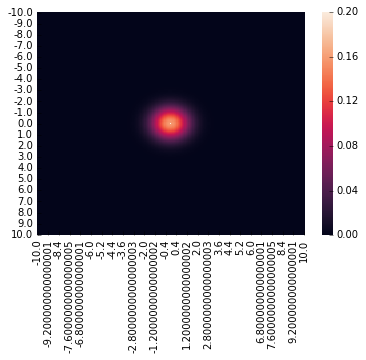

DISCRETE:
DISCRETE QUDS: [(['swims'], 1.0)]


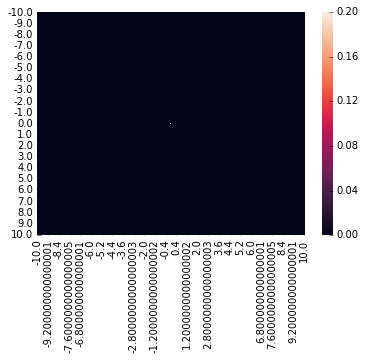

In [29]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",l1_sig1=1.0,subj="man",quds=['swims'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)
hm_disc,quds_disc = titrate(model_type="discrete_exact", l1_sig1=1.0,subj="man",quds=['swims'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)

print("MIXTURE:")

seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
plt.close()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()

In [101]:
# hm_mix[0].shape
# seaborn.heatmap(hm_mix)
# plt.show()

1.0

RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 2 possible utterances and 1
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 1 [['vicious']]
quds 1
QUD MATRIX SHAPE Tensor("Cast_45:0", shape=(1, 2, 1), dtype=float32)
SIZE,AMOUNT 100 0.1
discrete_worlds Tensor("Const_19:0", shape=(40401, 2), dtype=float32)
['vicious'] CURRENT QUD
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
QUD ['vicious']
DETERMINANT 10.722193
MEAN [1.1310866 0.       ]
QUD SCORE TERMS [1.1861578, 0.0, -2.4775553]
QUD SCORE -1.2913975
['vicious'] [array([1.1310866, 0.       ], dtype=float32)]
[[1.1310866]]
RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_exact RSA with 2 possible utterances and 1
RUNNING DISCRETE EXACT MODEL
QUDS: [['vicious']]
(1, 2, 2) (1, 1

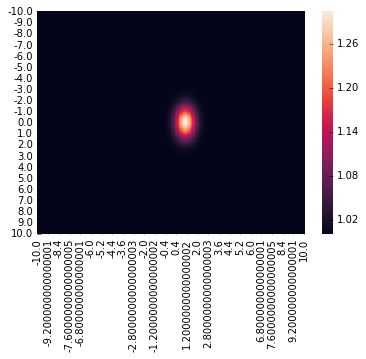

DISCRETE:
DISCRETE QUDS: [(['vicious'], 1.0)]


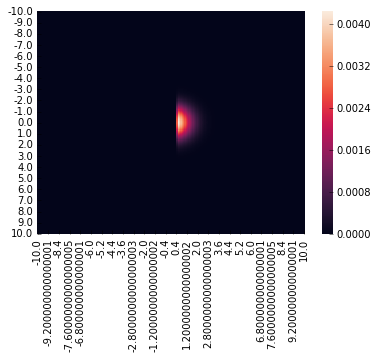

In [23]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",l1_sig1=1.0,subj="man",quds=['vicious'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)
hm_disc,quds_disc = titrate(model_type="discrete_exact", l1_sig1=1.0,subj="man",quds=['vicious'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()

RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 2 possible utterances and 2
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 2 [['nightmare'], ['swims']]
quds 2
QUD MATRIX SHAPE Tensor("Cast_15:0", shape=(2, 2, 1), dtype=float32)
SIZE,AMOUNT 100 0.1
discrete_worlds Tensor("Const_4:0", shape=(40401, 2), dtype=float32)
['nightmare'] CURRENT QUD
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
['swims'] CURRENT QUD
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
['nightmare'] [array([1.1071142, 1.1071142], dtype=float32)]
[[1.5656961]]
['swims'] [array([0.0000000e+00, 7.0401427e-07], dtype=float32)]
[[7.0401427e-07]]
RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_exact RSA with 2 possible utterances and 2


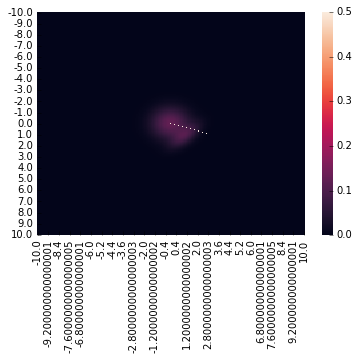

DISCRETE:
DISCRETE QUDS: [(['swims'], 0.7721099), (['nightmare'], 0.227884)]


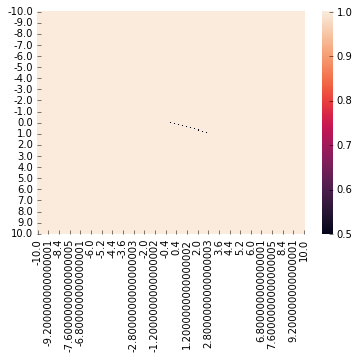

In [5]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",l1_sig1=1.0,subj="man",quds=['nightmare','swims'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)
hm_disc,quds_disc = titrate(model_type="discrete_exact", l1_sig1=1.0,subj="man",quds=['nightmare','swims'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()

RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 2 possible utterances and 3
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 3 [['swims'], ['vicious'], ['wonder']]
quds 3
QUD MATRIX SHAPE Tensor("Cast_67:0", shape=(3, 2, 1), dtype=float32)
SIZE,AMOUNT 100 0.1
discrete_worlds Tensor("Const_26:0", shape=(40401, 2), dtype=float32)
['swims'] CURRENT QUD
(3, 2, 2) (3, 1, 2)
(3, 2) shape out
['vicious'] CURRENT QUD
(3, 2, 2) (3, 1, 2)
(3, 2) shape out
['wonder'] CURRENT QUD
(3, 2, 2) (3, 1, 2)
(3, 2) shape out
(3, 2, 2) (3, 1, 2)
(3, 2) shape out
QUD ['swims']
DETERMINANT 39.47832
MEAN [0.0000000e+00 7.0401427e-07]
QUD SCORE TERMS [1.8378758, -0.69314575, -1.837877]
QUD SCORE -0.69314694
(3, 2, 2) (3, 1, 2)
(3, 2) shape out
QUD ['vicious']
DETERMINANT 10.722193
MEAN [1.1310866 0.       ]
QUD SCORE TERMS [1.1861578, 0.0, -2.4775553]
QUD SCORE -1.2913975
(3, 2, 2) (3, 1

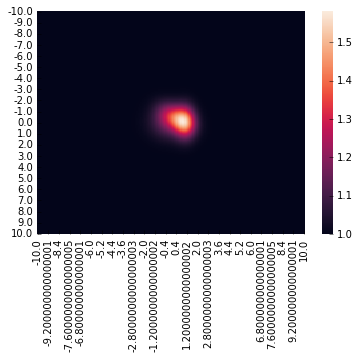

DISCRETE:
DISCRETE QUDS: [(['wonder'], 0.43908283), (['swims'], 0.34498337), (['vicious'], 0.215931)]


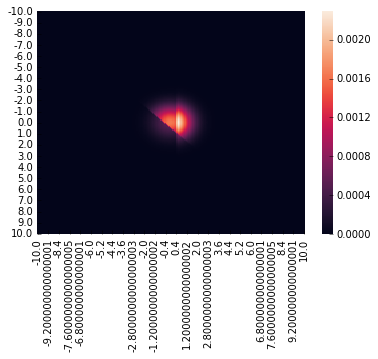

In [26]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",l1_sig1=1.0,subj="man",quds=['vicious','swims','wonder'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)
hm_disc,quds_disc = titrate(model_type="discrete_exact", l1_sig1=1.0,subj="man",quds=['vicious','swims','wonder'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()

RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 3 possible utterances and 2
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 2 [['swims'], ['vicious']]
quds 2
QUD MATRIX SHAPE Tensor("Cast_78:0", shape=(2, 2, 1), dtype=float32)
SIZE,AMOUNT 100 0.1
discrete_worlds Tensor("Const_31:0", shape=(40401, 2), dtype=float32)
['swims'] CURRENT QUD
(2, 3, 2) (2, 1, 2)
(2, 3) shape out
['vicious'] CURRENT QUD
(2, 3, 2) (2, 1, 2)
(2, 3) shape out
(2, 3, 2) (2, 1, 2)
(2, 3) shape out
QUD ['swims']
DETERMINANT 10.798546
MEAN [0.        1.1209425]
QUD SCORE TERMS [1.1897057, -0.6931472, -2.466133]
QUD SCORE -1.9695746
(2, 3, 2) (2, 1, 2)
(2, 3) shape out
QUD ['vicious']
DETERMINANT 10.618218
MEAN [1.1434448 0.       ]
QUD SCORE TERMS [1.1812856, 0.0, -2.49161]
QUD SCORE -1.3103244
['swims'] [array([0.       , 1.1209425], dtype=float32)]
[[1.1209425]]
['vicious'] [array([1.14344

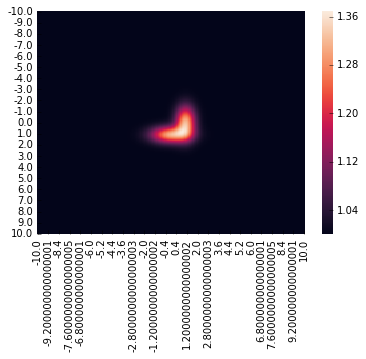

DISCRETE:
DISCRETE QUDS: [(['vicious'], 0.6587094), (['swims'], 0.34128937)]


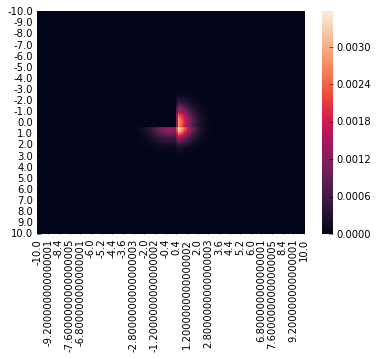

In [27]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",l1_sig1=1.0,subj="man",quds=['vicious','swims'],possible_utterances=["shark","swimmer","man"],pred='shark',sig1=1.0,sig2=0.1)
hm_disc,quds_disc = titrate(model_type="discrete_exact", l1_sig1=1.0,subj="man",quds=['vicious','swims'],possible_utterances=["shark","swimmer","man"],pred='shark',sig1=1.0,sig2=0.1)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()

RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 2 possible utterances and 1
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 1 [['nightmare']]
quds 1
QUD MATRIX SHAPE Tensor("Cast_89:0", shape=(1, 2, 1), dtype=float32)
SIZE,AMOUNT 100 0.1
discrete_worlds Tensor("Const_35:0", shape=(40401, 2), dtype=float32)
['nightmare'] CURRENT QUD
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
QUD ['nightmare']
DETERMINANT 7.623828
MEAN [1.1071142 1.1071142]
QUD SCORE TERMS [1.0156393, 0.0, -3.0635788]
QUD SCORE -2.0479395
['nightmare'] [array([1.1071142, 1.1071142], dtype=float32)]
[[1.5656961]]
RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_exact RSA with 2 possible utterances and 1
RUNNING DISCRETE EXACT MODEL
QUDS: [['nightmare']]
(1, 2,

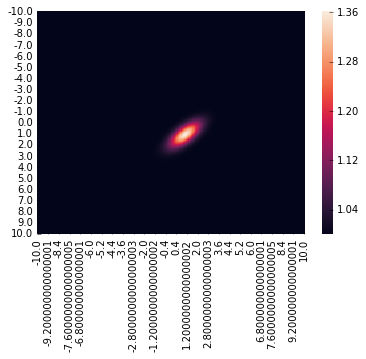

DISCRETE:
DISCRETE QUDS: [(['nightmare'], 1.0)]


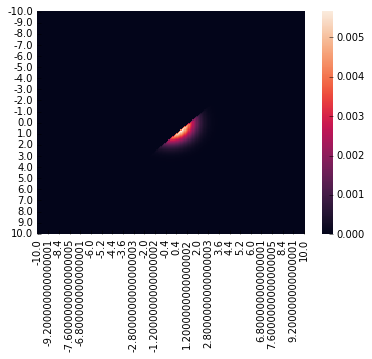

In [29]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",l1_sig1=1.0,subj="man",quds=['nightmare'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)
hm_disc,quds_disc = titrate(model_type="discrete_exact", l1_sig1=1.0,subj="man",quds=['nightmare'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()



RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['child']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 3 possible utterances and 4
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 4 [['child'], ['swims'], ['vicious'], ['wonder']]
quds 4
QUD MATRIX SHAPE Tensor("Cast_111:0", shape=(4, 2, 1), dtype=float32)
SIZE,AMOUNT 100 0.1
discrete_worlds Tensor("Const_41:0", shape=(40401, 2), dtype=float32)
['child'] CURRENT QUD
(4, 3, 2) (4, 1, 2)
(4, 3) shape out
['swims'] CURRENT QUD
(4, 3, 2) (4, 1, 2)
(4, 3) shape out
['vicious'] CURRENT QUD
(4, 3, 2) (4, 1, 2)
(4, 3) shape out
['wonder'] CURRENT QUD
(4, 3, 2) (4, 1, 2)
(4, 3) shape out
(4, 3, 2) (4, 1, 2)
(4, 3) shape out
QUD ['child']
DETERMINANT 1.0443245
MEAN [-0.06630146  0.663014  ]
QUD SCORE TERMS [0.02168516, -0.07278299, -3.234513]
QUD SCORE -3.285611
(4, 3, 2) (4, 1, 2)
(4, 3) shape out
QUD ['swims']
DETERMINANT 6.0355625
MEAN [0.1        0.90478176]
QUD SCORE TE

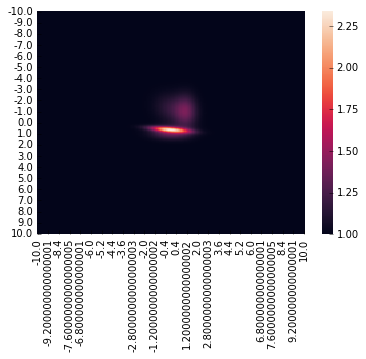

DISCRETE:
DISCRETE QUDS: [(['wonder'], 0.5061752), (['vicious'], 0.39769116), (['child'], 0.054189898), (['swims'], 0.041941512)]


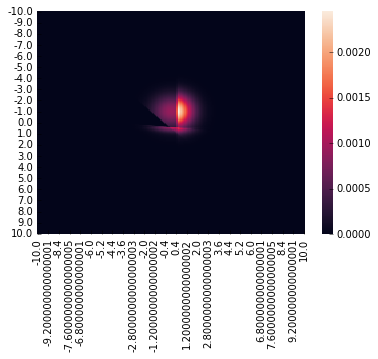

In [31]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",l1_sig1=1.0,subj="child",quds=['vicious','swims','wonder','child'],possible_utterances=["shark","swimmer","man"],pred='shark',sig1=1.0,sig2=0.1)
hm_disc,quds_disc = titrate(model_type="discrete_exact", l1_sig1=1.0,subj="child",quds=['vicious','swims','wonder','child'],possible_utterances=["shark","swimmer","man"],pred='shark',sig1=1.0,sig2=0.1)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()


RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 2 possible utterances and 2
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 2 [['swims'], ['vicious']]
quds 2
QUD MATRIX SHAPE Tensor("Cast_255:0", shape=(2, 2, 1), dtype=float32)
SIZE,AMOUNT 100 0.1
discrete_worlds Tensor("Const_85:0", shape=(40401, 2), dtype=float32)
['swims'] CURRENT QUD
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
['vicious'] CURRENT QUD
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
QUD ['swims']
DETERMINANT 39.47832
MEAN [0.0000000e+00 7.0401427e-07]
QUD SCORE TERMS [1.8378758, -0.69314575, -1.837877]
QUD SCORE -0.69314694
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
QUD ['vicious']
DETERMINANT 10.722193
MEAN [1.1310866 0.       ]
QUD SCORE TERMS [1.1861578, 0.0, -2.4775553]
QUD SCORE -1.2913975
['swims'] [array([0.0000000e+00, 7.0401427e-07], dtype=float32)]
[[7.0401427e-07]]
['v

(2, 2, 2) (2, 1, 2)
(2, 2) shape out
MEAN [4.3542430e-01 3.3277527e-07]
HEATMAP ARRAY:               -10.0         -9.9          -9.8          -9.7          -9.6   \
-10.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.9   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.8   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.7   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.6   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.5   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.4   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.3   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.2   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.1   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.0   0.000000e+00  0.000000e+00  0.000000e

MIXTURE QUDS: [(['swims'], 0.6452559), (['vicious'], 0.35474405)]


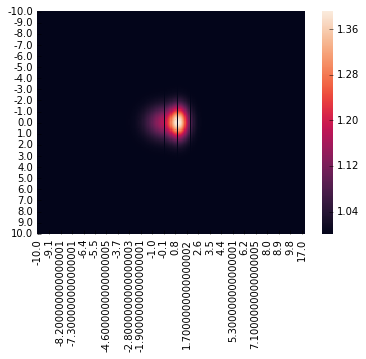

DISCRETE:
DISCRETE QUDS: [(['swims'], 0.615034), (['vicious'], 0.3849603)]


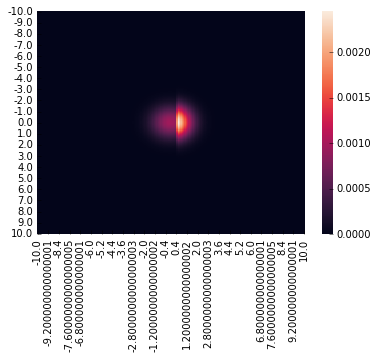

In [55]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",l1_sig1=1.0,subj="man",quds=['vicious','swims'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)
hm_disc,quds_disc = titrate(model_type="discrete_exact", l1_sig1=1.0,subj="man",quds=['vicious','swims'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()
